In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Between Area Brain Measured Distance

In [3]:
df_distance = pd.read_csv("marmoset_brain_connectivity_1_0_interareal_distance_matrix.txt",delimiter = " ",header = None)
df_distance.head()

,0,1,2
0,S2I,S2I,0.000000
1,S2I,AuRTM,8.861879
2,S2I,AuRTL,9.559203
3,S2I,OPAl,10.534215
4,S2I,A6M,9.032605


In [4]:
df_distance.columns = ["Source", "Target", "Distance"]

In [5]:
df_distance.isna().any()

Source      False
Target      False
Distance    False
dtype: bool

In [6]:
print("There are {} marmoset brain areas.".format(df_distance['Source'].nunique()))

There are 116 marmoset brain areas.


In [7]:
df_distance.shape[0]

13456

#### Let's see which areas are the closest together!

In [18]:
closest_distances = df_distance.sort_values(by = 'Distance')
closest_distances[avg_distances['Distance'] >0].head(10)

,Source,Target,Distance
8229,AuR,AuRM,0.374496
12714,AuRM,AuR,0.374496
11020,S2E,S2I,0.965424
95,S2I,S2E,0.965424
10414,A24c,A24b,1.049914
10529,A24b,A24c,1.049914
7606,A36,A35,1.079677
7721,A35,A36,1.079677
233,AuRTL,AuRTM,1.082605
118,AuRTM,AuRTL,1.082605


#### What about the furthest?

In [19]:
furthest_distances = df_distance.sort_values(by = 'Distance', ascending = False)
furthest_distances[avg_distances['Distance'] >0].head(10)

<ipython-input-19-4bf4db3bab6b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  furthest_distances[avg_distances['Distance'] >0].head(10)


,Source,Target,Distance
1080,V1,APir,28.439692
4185,APir,V1,28.439692
1138,V1,A10,26.883436
10913,A10,V1,26.883436
4417,Ent,V1,26.581699
1082,V1,Ent,26.581699
11578,V3,A10,26.356394
11003,A10,V3,26.356394
2445,A13b,V1,26.183636
1065,V1,A13b,26.183636


In [20]:
df_distance['Distance'].describe()

count    13456.000000
mean        12.437502
std          5.302477
min          0.000000
25%          8.305537
50%         12.364039
75%         16.372699
max         28.439692
Name: Distance, dtype: float64

#### Correlation Heatmap

In [54]:
df_connection_matrix = df_connection.pivot(index = 'Source', columns = 'Target', values = 'Weight')
df_connection_matrix = df_connection_matrix.fillna(0)
df_connection_matrix.sort_index(ascending=True)                                                                                                                                                                  
df_connection_matrix.head()

Target,A1-2,A10,A11,A13L,A13M,A13a,A13b,A14C,A14R,A19DI,...,V1,V2,V3,V3A,V4,V4T,V5,V6,V6A,VIP
Source,,,,,,,,,,,,,,,,,,,,,
A1-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000096,0.000000
A10,0.000019,0.000000,0.061765,0.022644,0.026493,0.001110,0.029881,0.001297,0.061059,0.000000,...,0.000000,0.000064,0.000224,0.000000,0.000298,0.000056,0.000000,0.000000,0.000000,0.000000
A11,0.000089,0.377733,0.000000,0.026994,0.033499,0.004956,0.022347,0.003009,0.042659,0.000000,...,0.000000,0.000089,0.000752,0.000000,0.000487,0.000000,0.000000,0.000000,0.000000,0.000000
A19DI,0.000132,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006861,0.316269,0.220346,0.023354,0.074812,0.070062,0.023618,0.102388,0.000000,0.007389
A19M,0.000000,0.000590,0.008264,0.000000,0.000590,0.000000,0.000000,0.000000,0.000000,0.005313,...,0.031287,0.031287,0.022432,0.000590,0.002361,0.000000,0.000000,0.030106,0.001181,0.000000


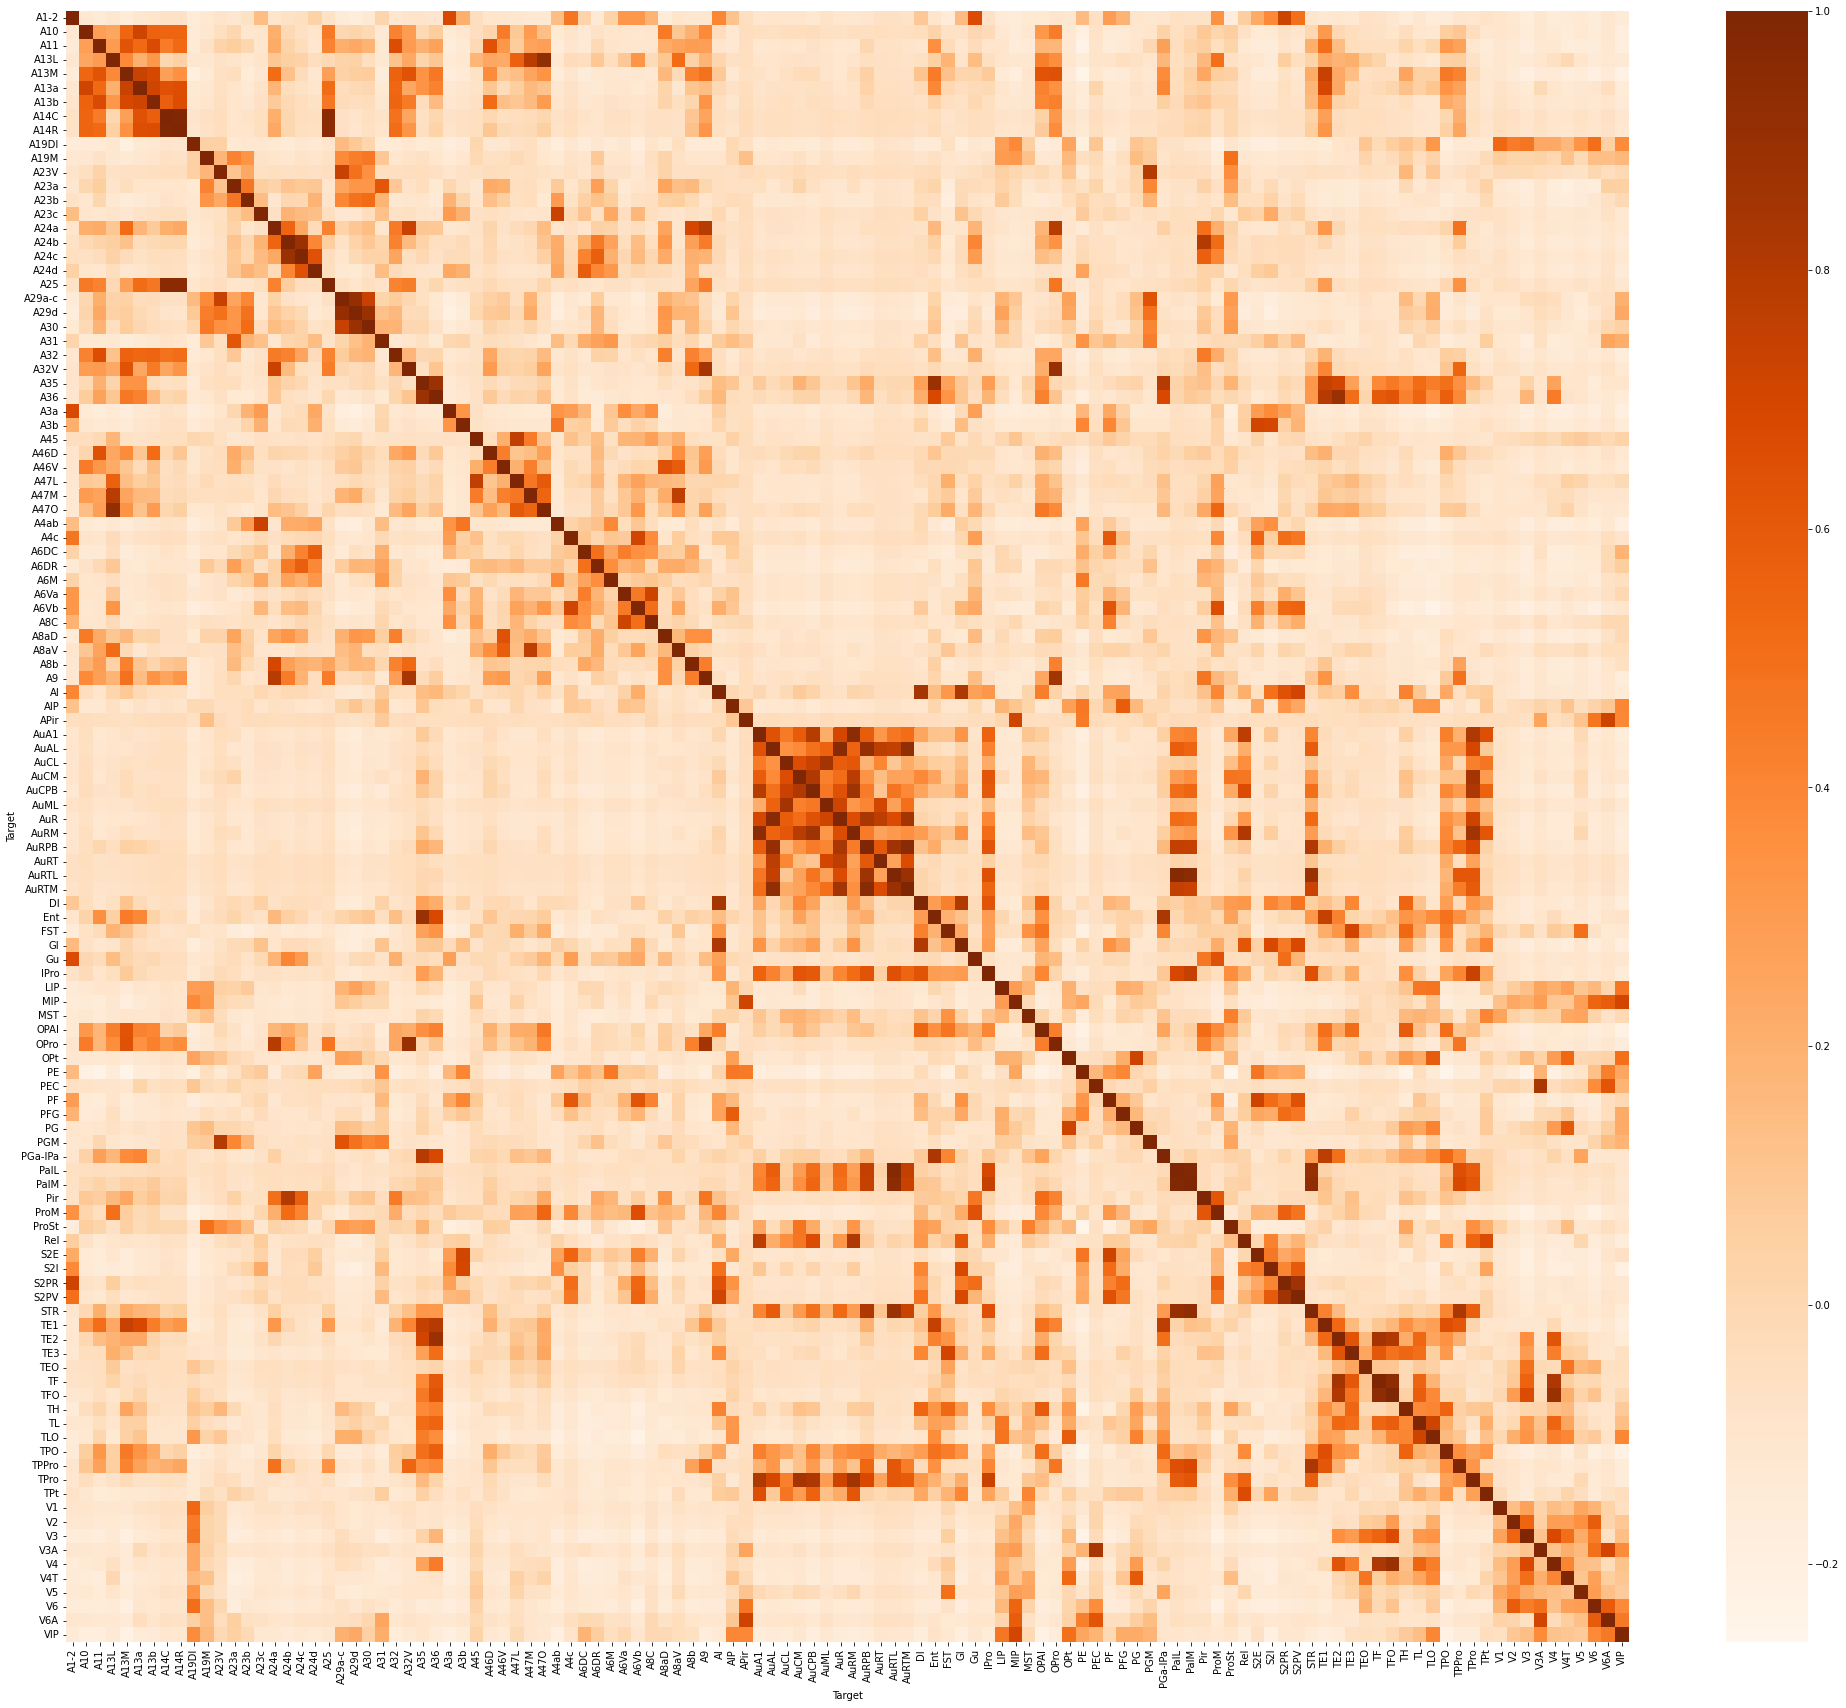

In [55]:
plt.figure(figsize=(35,30))
sns.heatmap(df_connection_matrix.corr().sort_index(axis=0).sort_index(axis=1), cmap = 'Oranges',xticklabels=True, yticklabels=True)
plt.show()

# Marmoset brain connectome

In [21]:
df_connection = pd.read_csv("marmoset_brain_connectivity_1_0_fln_matrix.txt",delimiter = " ",header = None)
df_connection.head()

,0,1,2
0,A6M,S2I,0.000906
1,A6M,AuRTM,0.000000
2,A6M,AuRTL,0.000000
3,A6M,OPAl,0.000000
4,A6M,LIP,0.000000


In [23]:
df_connection.columns = ["Source", "Target", "Weight"]

In [25]:
df_connection = df_connection[df_connection.Weight != 0.0] # only keep relevant connections

In [26]:
df_connection.isna().any()

Source    False
Target    False
Weight    False
dtype: bool

In [27]:
print("There are {} marmoset brain areas.".format(df_connection['Source'].nunique()))

There are 55 marmoset brain areas.


In [28]:
print("There are {} marmoset brain areas.".format(df_connection['Target'].nunique()))

There are 116 marmoset brain areas.


#### Creating our connectome graph

In [29]:
edge_dict = dict([(str(round(i,4)),[x,y]) for i, x,y in zip(df_connection.Weight, df_connection.Target,df_connection.Source)])

In [30]:
G = nx.Graph()

nodes = df_connection['Source'].unique()
for node in nodes:
    G.add_node(node, attr = 'node')

for index,row in df_connection.iterrows():
    G.add_edges_from([(row['Source'], row['Target'])])

#### Analyzing the graph

In [31]:
deg = nx.degree_centrality(G) # Degrees for better visualization

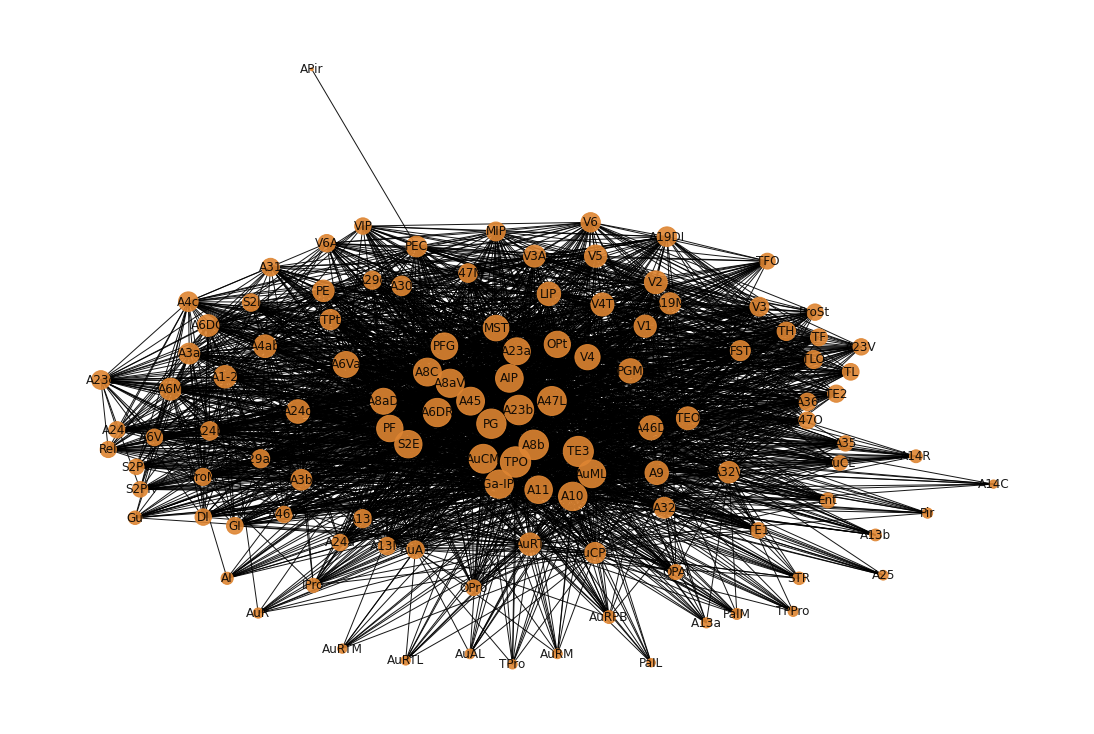

In [32]:
G.remove_edges_from(nx.selfloop_edges(G))
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize = (15,10))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1, node_size=[v * 1000 for v in deg.values()],
    node_color='#DE8532', alpha=0.9,
    labels={node: node for node in G.nodes()}
)

In [35]:
def measures_for_network(G):
    # -*- coding: utf-8 -*-
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()

    sns.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()    
    
    sns.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    sns.distplot(list(nx.clustering(G).values()), bins=20)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    print('average degree connectivity', nx.average_degree_connectivity(G))
    print('average neighbor degree', nx.average_neighbor_degree(G))
    print('average clustering')
    avclus = nx.average_clustering(G)
    print(avclus)
    
    components = len(max(nx.connected_components(G)))
    print("Number of components", components)
    
    nx.clustering(G)

drawing measures for graph


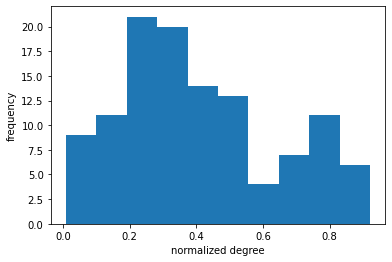

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


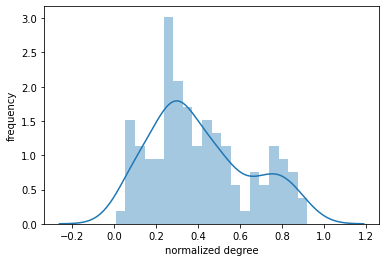

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


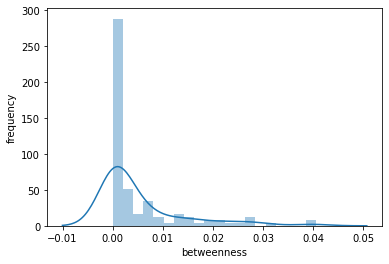

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


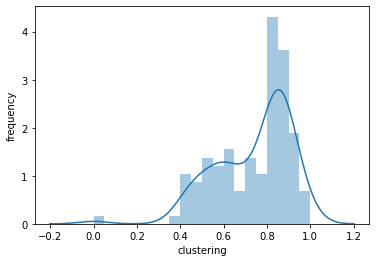

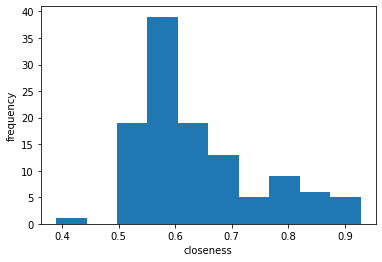

calculating global measures
average degree connectivity {55: 59.93636363636364, 63: 58.98412698412698, 41: 71.48780487804878, 36: 66.58333333333333, 57: 60.026315789473685, 92: 51.641304347826086, 60: 61.0, 73: 57.02739726027397, 77: 57.27272727272727, 83: 56.855421686746986, 100: 50.68, 40: 68.525, 106: 47.783018867924525, 52: 65.34615384615384, 44: 66.12878787878788, 80: 52.725, 99: 50.77777777777778, 53: 56.575471698113205, 96: 51.9375, 79: 56.924050632911396, 50: 57.26, 89: 51.86516853932584, 91: 54.0989010989011, 59: 58.559322033898304, 61: 61.459016393442624, 49: 60.60204081632653, 43: 63.53488372093023, 54: 61.074074074074076, 104: 47.90384615384615, 81: 56.4320987654321, 67: 57.52238805970149, 75: 58.986666666666665, 88: 53.35227272727273, 64: 56.09375, 87: 48.93103448275862, 93: 47.16129032258065, 86: 53.43023255813954, 68: 58.10294117647059, 58: 53.14655172413793, 95: 49.03157894736842, 35: 76.79285714285714, 28: 80.75892857142857, 32: 77.54166666666667, 21: 77.95238095238095

In [ ]:
measures_for_network(G)

#### Density

In [36]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.4088455772113943


#### Components

In [37]:
print(nx.is_connected(G))
components = nx.connected_components(G)
largest_component = max(components, key=len)
print(len(largest_component))

True
116


#### Transitivity

In [38]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.5980469289579418


#### Degree

In [39]:
from operator import itemgetter

In [40]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [41]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('TPO', 106)
('TE3', 104)
('A23b', 100)
('A8b', 100)
('PG', 99)
('A47L', 96)
('AuCM', 95)
('A10', 93)
('PGa-IPa', 92)
('A6DR', 92)
('A8aV', 91)
('A45', 89)
('AuML', 89)
('A8C', 89)
('AIP', 88)
('A11', 87)
('S2E', 86)
('A23a', 83)
('PFG', 81)
('PF', 80)


#### Other centrality measures

In [42]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [43]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('TPO', 0.040651224475189845)
('TE3', 0.03887542420748148)
('A10', 0.030643282530498403)
('AuCM', 0.028334603510650785)
('A8b', 0.028132296378971397)
('AuML', 0.026616250205646695)
('PGa-IPa', 0.02483073457739683)
('PG', 0.02321559364374703)
('A11', 0.022329074895192064)
('A23b', 0.021604647986230362)
('A47L', 0.018427236114795947)
('PEC', 0.018379505841012656)
('A6DR', 0.017461011923535195)
('A8aV', 0.015394963911256597)
('S2E', 0.014802904290774741)
('A45', 0.014570028989809776)
('A8C', 0.013469581803716177)
('PF', 0.01315092035540321)
('AIP', 0.013137036498377502)
('AuRT', 0.012847721665635334)


#### Communities

In [44]:
from networkx.algorithms import community

In [45]:
communities = community.greedy_modularity_communities(G)

In [46]:
modularity_dict = {} 
for i,c in enumerate(communities): 
    for name in c: 
        modularity_dict[name] = i 
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [47]:
louvain_comm = community.louvain_communities(G, seed=123)

In [48]:
for comm in louvain_comm:
  print(len(comm))

36
35
45


### Distances In-Graph (by direct node connections)

In [ ]:
### We want to multiply the connection weight with the shortest path length for each pair of brain areas
### For that, we need to do a lot of pivoting and unpivoting

In [49]:
path = nx.all_pairs_shortest_path_length(G) 
dpath = {x[0]:x[1] for x in path}          

In [50]:
distances_in_graph = pd.DataFrame(columns = ['Source', 'Target', 'Distance'])

In [51]:
distances_in_graph = pd.DataFrame.from_dict(dpath)
distances_in_graph = distances_in_graph.sort_index(ascending=True)

In [52]:
distances_in_graph.head()

,A6M,LIP,MIP,AuA1,V1,PGa-IPa,V2,V4,A6Va,A23a,...,A14R,TE1,IPro,OPro,PaIL,PaIM,TPPro,A25,A14C,APir
A1-2,1,1,2,1,2,1,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
A10,2,1,2,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
A11,1,1,2,2,2,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,3
A13L,1,2,2,2,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3
A13M,1,2,2,2,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3


#### Fixing Rows

In [56]:
areas = [*df_connection_matrix.index, *distances_in_graph.index]

In [57]:
for index,row in distances_in_graph.iterrows():
  if index not in df_connection_matrix.index:
    distances_in_graph.drop(index, axis=0, inplace=True)

In [58]:
distances_in_graph.head()

,A6M,LIP,MIP,AuA1,V1,PGa-IPa,V2,V4,A6Va,A23a,...,A14R,TE1,IPro,OPro,PaIL,PaIM,TPPro,A25,A14C,APir
A1-2,1,1,2,1,2,1,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
A10,2,1,2,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
A11,1,1,2,2,2,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,3
A19DI,2,1,1,2,1,2,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
A19M,2,1,1,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


#### Fixing columns

In [59]:
df_connection_matrix.columns

Index(['A1-2', 'A10', 'A11', 'A13L', 'A13M', 'A13a', 'A13b', 'A14C', 'A14R',
       'A19DI',
       ...
       'V1', 'V2', 'V3', 'V3A', 'V4', 'V4T', 'V5', 'V6', 'V6A', 'VIP'],
      dtype='object', name='Target', length=116)

In [60]:
distances_in_graph.columns

Index(['A6M', 'LIP', 'MIP', 'AuA1', 'V1', 'PGa-IPa', 'V2', 'V4', 'A6Va',
       'A23a',
       ...
       'A14R', 'TE1', 'IPro', 'OPro', 'PaIL', 'PaIM', 'TPPro', 'A25', 'A14C',
       'APir'],
      dtype='object', length=116)

In [61]:
distances = distances_in_graph.reindex(sorted(distances_in_graph.columns), axis=1)
df_connection_matrix = df_connection_matrix.reindex(sorted(df_connection_matrix.columns), axis=1)

In [62]:
distances.head()

,A1-2,A10,A11,A13L,A13M,A13a,A13b,A14C,A14R,A19DI,...,V1,V2,V3,V3A,V4,V4T,V5,V6,V6A,VIP
A1-2,0,1,1,2,2,2,2,2,2,1,...,2,2,2,2,2,1,1,2,1,2
A10,1,0,1,1,1,1,1,1,1,2,...,2,1,1,2,1,1,2,2,2,2
A11,1,1,0,1,1,1,1,1,1,2,...,2,1,1,2,1,2,2,2,2,2
A19DI,1,2,2,1,2,2,2,2,2,0,...,1,1,1,1,1,1,1,1,2,1
A19M,2,1,1,2,1,2,2,2,2,1,...,1,1,1,1,1,1,1,1,1,2


#### Multiplication

In [63]:
graph_distance = pd.DataFrame(distances_in_graph.values*df_connection_matrix.values, columns=distances_in_graph.columns, index=distances_in_graph.index)
graph_distance = graph_distance.reset_index() 

In [64]:
graph_distance.head()

,index,A6M,LIP,MIP,AuA1,V1,PGa-IPa,V2,V4,A6Va,...,A14R,TE1,IPro,OPro,PaIL,PaIM,TPPro,A25,A14C,APir
0,A1-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000191,0.000000
1,A10,0.000038,0.000000,0.123531,0.022644,0.052986,0.001110,0.029881,0.001297,0.061059,...,0.000000,0.000064,0.000224,0.000000,0.000298,0.000056,0.000000,0.000000,0.000000,0.000000
2,A11,0.000089,0.377733,0.000000,0.053987,0.066997,0.004956,0.022347,0.003009,0.042659,...,0.000000,0.000089,0.000752,0.000000,0.000974,0.000000,0.000000,0.000000,0.000000,0.000000
3,A19DI,0.000264,0.000000,0.000000,0.000264,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013722,0.632537,0.440691,0.046708,0.149624,0.140124,0.047236,0.204776,0.000000,0.014778
4,A19M,0.000000,0.000590,0.008264,0.000000,0.000590,0.000000,0.000000,0.000000,0.000000,...,0.062574,0.062574,0.044864,0.001181,0.004723,0.000000,0.000000,0.060213,0.002361,0.000000


In [65]:
graph_distance.corr()

,A6M,LIP,MIP,AuA1,V1,PGa-IPa,V2,V4,A6Va,A23a,...,A14R,TE1,IPro,OPro,PaIL,PaIM,TPPro,A25,A14C,APir
A6M,1.000000,-0.116943,-0.127379,-0.108849,-0.131631,-0.110941,-0.096748,-0.064608,-0.070010,-0.155904,...,-0.093924,-0.116174,-0.167602,-0.110979,-0.156437,-0.152661,-0.130501,-0.164318,-0.104147,-0.147541
LIP,-0.116943,1.000000,0.404798,0.189604,0.455912,0.748727,0.614106,0.774989,0.774317,-0.132418,...,-0.086672,-0.105282,-0.150431,-0.101774,-0.133358,-0.149834,-0.117836,-0.147103,-0.110526,-0.179200
MIP,-0.127379,0.404798,1.000000,0.140543,0.602645,0.501478,0.763532,0.488378,0.534516,-0.137891,...,-0.091896,-0.110899,-0.153923,-0.106090,-0.130068,-0.153633,-0.127705,-0.147056,-0.110504,-0.169754
AuA1,-0.108849,0.189604,0.140543,1.000000,0.320453,0.196423,0.228807,-0.010492,0.001445,-0.097493,...,-0.095121,-0.112824,-0.135147,-0.102208,-0.045228,0.012062,-0.088749,-0.135953,-0.111874,-0.122595
V1,-0.131631,0.455912,0.602645,0.320453,1.000000,0.635810,0.733917,0.179218,0.230049,-0.161146,...,-0.100385,-0.121710,-0.174469,-0.118225,-0.148111,-0.165600,-0.136910,-0.172536,-0.125457,-0.195978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PaIM,-0.152661,-0.149834,-0.153633,0.012062,-0.165600,-0.130066,-0.128558,-0.086660,-0.093834,0.169605,...,0.105788,0.268549,0.562542,0.196058,0.409814,1.000000,0.113674,0.272599,0.070153,0.112601
TPPro,-0.130501,-0.117836,-0.127705,-0.088749,-0.136910,-0.101260,-0.100135,-0.066867,-0.072476,0.350101,...,0.254492,0.328051,0.265774,0.157894,0.144550,0.113674,1.000000,0.297012,0.135454,0.061495
A25,-0.164318,-0.147103,-0.147056,-0.135953,-0.172536,-0.057986,-0.124847,-0.083243,-0.090246,0.505679,...,0.179504,0.579906,0.501606,0.495290,0.125372,0.272599,0.297012,1.000000,0.587467,0.287535
A14C,-0.104147,-0.110526,-0.110504,-0.111874,-0.125457,0.010283,-0.092081,-0.061426,-0.066579,0.047632,...,0.039705,0.022731,-0.048532,0.706120,-0.024894,0.070153,0.135454,0.587467,1.000000,0.311068


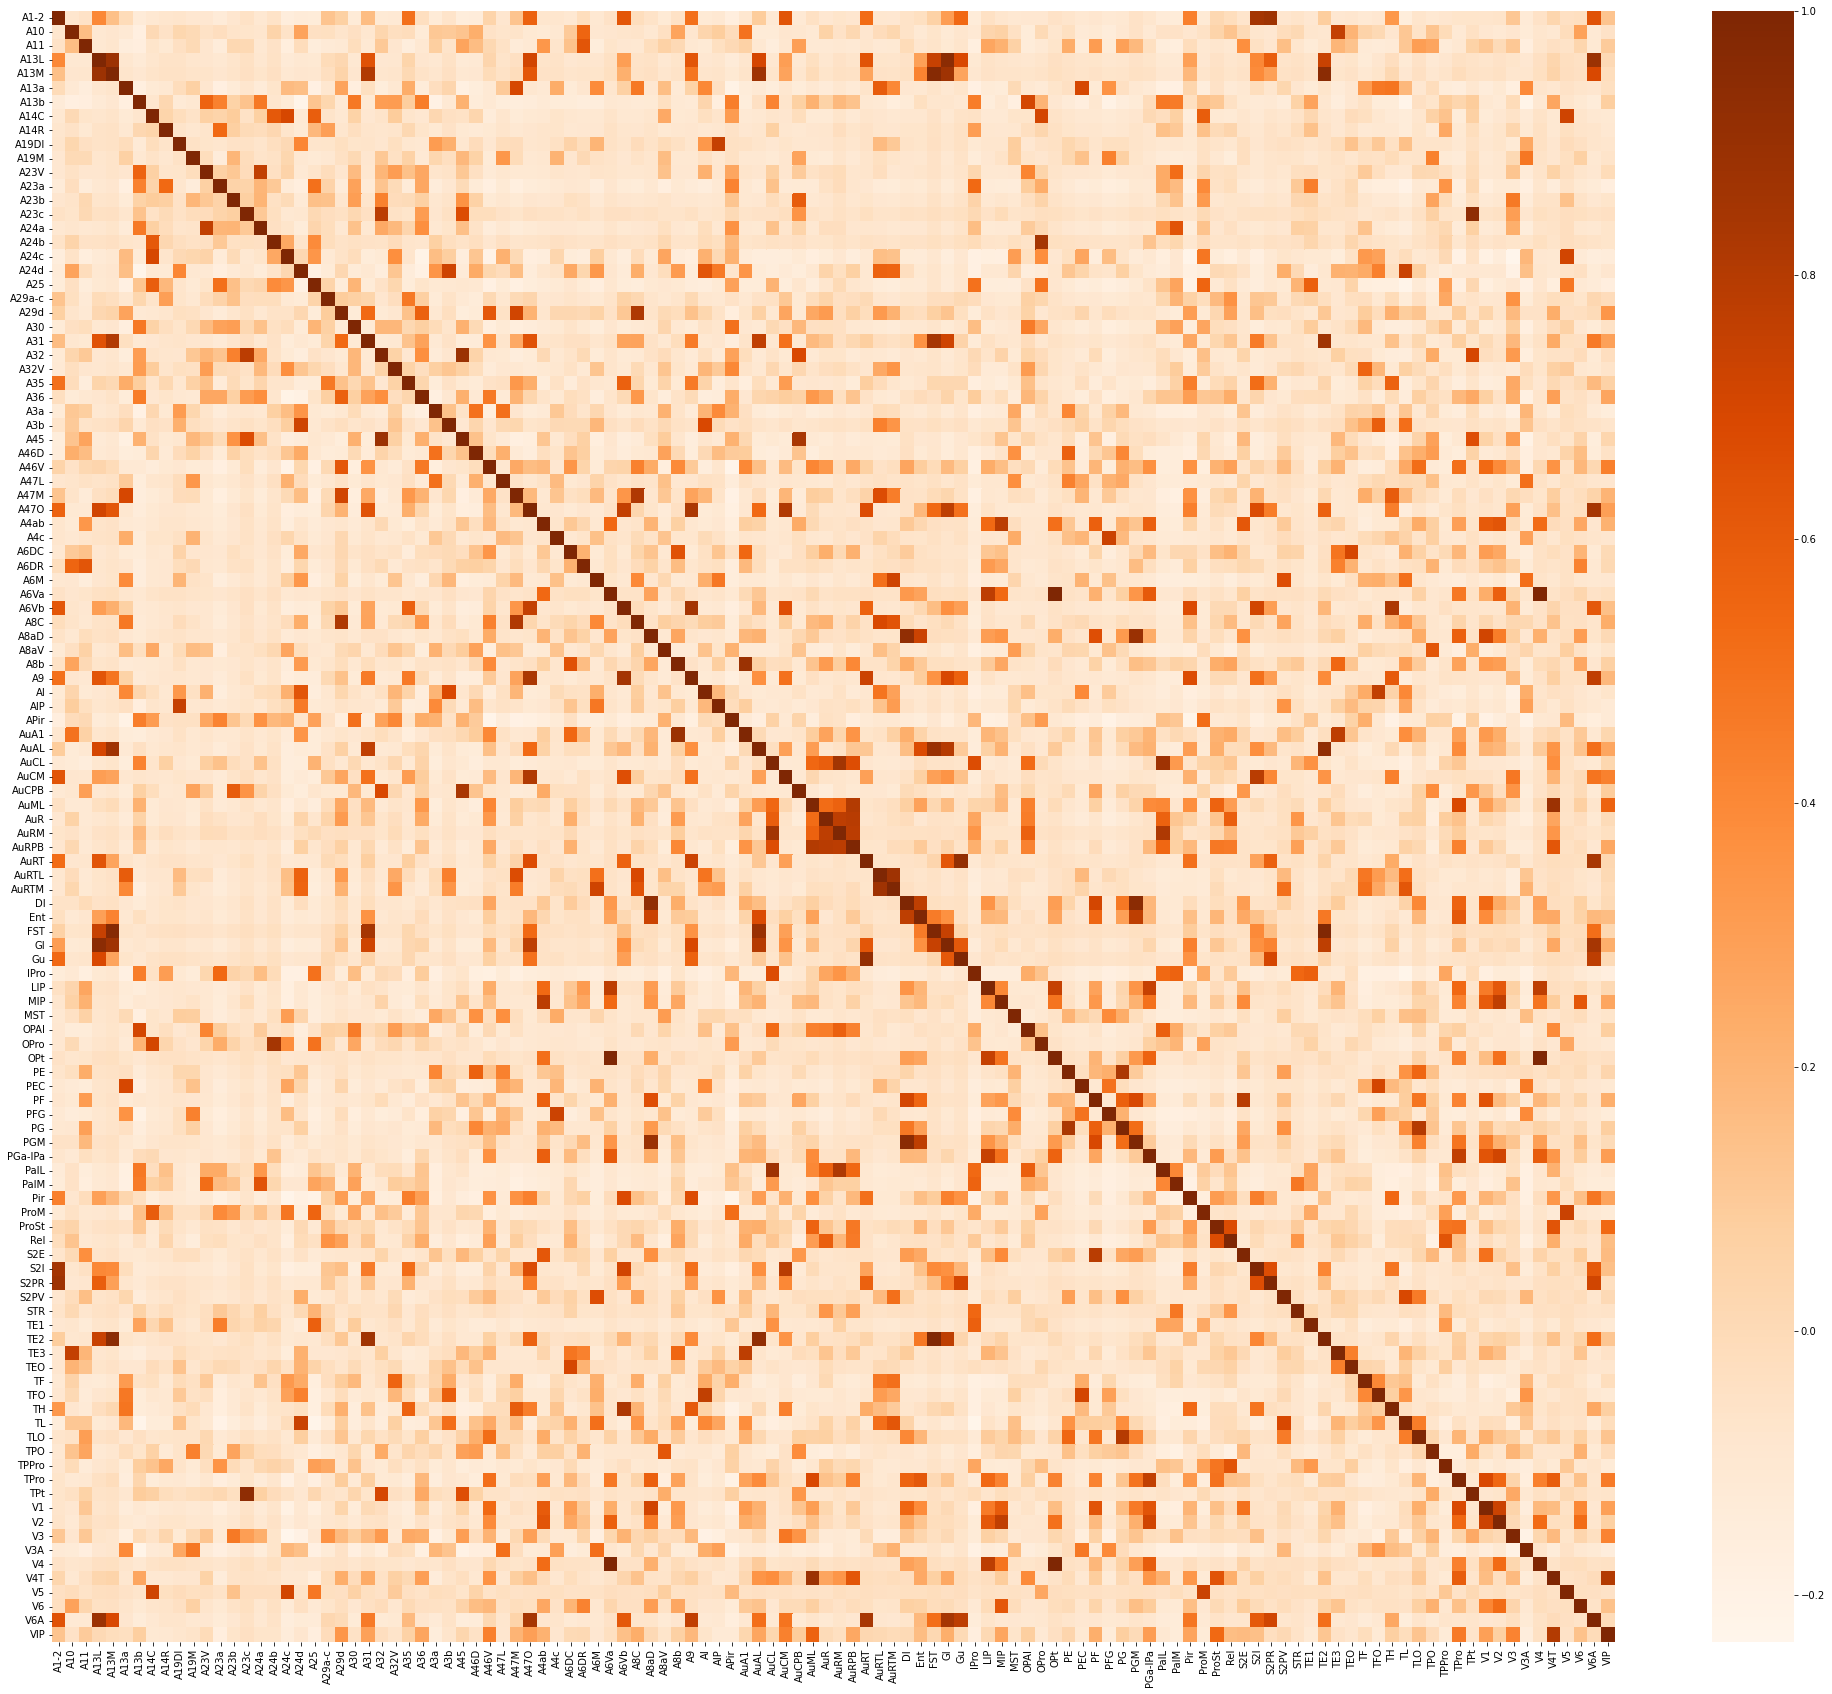

In [66]:
plt.figure(figsize=(35,30))
sns.heatmap(graph_distance.corr().sort_index(axis=0).sort_index(axis=1), cmap = 'Oranges',xticklabels=True, yticklabels=True)
plt.show()

In [67]:
gdistance_final = pd.DataFrame(columns = ['Source', 'Target', 'Graph Distance'])

In [68]:
for id,row in graph_distance.iterrows():
  for count in range(0, len(graph_distance.columns)):
    source =  row['index']
    target = graph_distance.columns[count]
    try:
      distance =  str(graph_distance.iloc[id][graph_distance.columns[count]])
    except:
      print("Couldn't retrieve value at:", id)
    gdistance_final = gdistance_final.append({'Source' : source, 'Target' : target, 'Graph Distance' : distance},ignore_index = True)

In [69]:
gdistance_final = gdistance_final[pd.to_numeric(gdistance_final['Graph Distance'], errors='coerce').notnull()]
gdistance_final['Graph Distance'] = gdistance_final['Graph Distance'].astype(float)

In [70]:
gdistance_final.drop_duplicates(inplace = True)
dummy = pd.DataFrame(np.sort(gdistance_final[['Source','Target']], axis=1), index = gdistance_final.index).duplicated()
gdistance_final = gdistance_final[~dummy]
gdistance_final = gdistance_final[gdistance_final['Graph Distance']> 0]
gdistance_final = gdistance_final.reset_index(drop= True)
gdistance_final.head()

,Source,Target,Graph Distance
0,A1-2,TPO,0.000860
1,A1-2,A19M,0.001147
2,A1-2,A4c,0.000414
3,A1-2,PG,0.003090
4,A1-2,PE,0.001242


# Comparing Distances

In [ ]:
df = pd.merge(df_distance, gdistance_final, how = 'inner', on = ['Source', 'Target'])
df.head()

,Source,Target,Distance,Graph Distance
0,A6M,AuRTM,16.429705,15576.787284
1,A6M,AuRTL,17.132874,5320.000000
2,A6M,MIP,13.467284,10216.000000
3,A6M,AuA1,13.412426,350.969962
4,A6M,V1,20.266913,23088.000000


In [ ]:
df = pd.merge(df, df_connection, how = 'left', on = ['Source', 'Target'])
df.head()

,Source,Target,Distance,Graph Distance,Weight
0,A6M,AuRTM,16.429705,15576.787284,NaN
1,A6M,AuRTL,17.132874,5320.000000,NaN
2,A6M,MIP,13.467284,10216.000000,NaN
3,A6M,AuA1,13.412426,350.969962,NaN
4,A6M,V1,20.266913,23088.000000,NaN


In [ ]:
df = df[df['Graph Distance'] >0]

In [ ]:
df.describe()

,Distance,Graph Distance,Weight
count,2634.000000,2634.000000,1543.000000
mean,12.777569,7668.809418,6841.786153
std,5.246187,19247.160895,18305.377398
min,0.965424,1.982026,1.982026
25%,8.577884,127.419481,115.102970
50%,12.621679,783.666667,677.796004
75%,16.647769,5114.958048,4621.090909
max,28.439692,217870.000000,217870.000000


In [ ]:
df['Graph Distance'] = 1/df['Graph Distance']

In [ ]:
df.corr()

,Distance,Graph Distance,Weight
Distance,1.000000,-0.049193,0.180857
Graph Distance,-0.049193,1.000000,-0.037463
Weight,0.180857,-0.037463,1.000000


In [ ]:
import scipy.stats as stats

In [ ]:
from sklearn.preprocessing import MinMaxScaler
  
df['Graph Distance'] = MinMaxScaler().fit_transform(np.array(df['Graph Distance']).reshape(-1,1))
df['Distance'] = MinMaxScaler().fit_transform(np.array(df['Distance']).reshape(-1,1))
df['Weight'] = MinMaxScaler().fit_transform(np.array(df['Weight']).reshape(-1,1))
# view normalized data  
display(df['Graph Distance'])

0       0.000118
1       0.000363
2       0.000185
3       0.005638
4       0.000077
          ...   
2629    0.008293
2630    0.000108
2631    0.002135
2632    0.002954
2633    0.000381
Name: Graph Distance, Length: 2634, dtype: float64

In [ ]:
df['Graph Distance']= ((df['Graph Distance']-df['Graph Distance'].mean())/df['Graph Distance'].std())
df['Distance']= ((df['Distance']-df['Distance'].mean())/df['Distance'].std())

In [ ]:
df.describe()

,Distance,Graph Distance,Weight
count,2.634000e+03,2.634000e+03,1543.000000
mean,-2.872923e-16,-4.990524e-17,0.031394
std,1.000000e+00,1.000000e+00,0.084020
min,-2.251568e+00,-3.532938e-01,0.000000
25%,-8.005214e-01,-3.480766e-01,0.000519
50%,-2.971501e-02,-3.185485e-01,0.003102
75%,7.377168e-01,-1.389550e-01,0.021201
max,2.985430e+00,1.343394e+01,1.000000


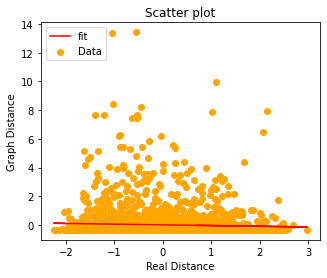

In [ ]:
fig = plt.figure(figsize=(5, 4))

plt.scatter(df['Distance'], df['Graph Distance'], color = 'orange', label = 'Data')

# Reg line
m, b = np.polyfit(df['Distance'],df['Graph Distance'], 1)
plt.plot(df['Distance'], m*df['Distance']+b, 'r-', label = 'fit')

plt.legend(loc='upper left')
plt.xlabel('Real Distance') 
plt.ylabel('Graph Distance')
plt.title('Scatter plot')
plt.show()

In [ ]:
sns.set_context("talk")

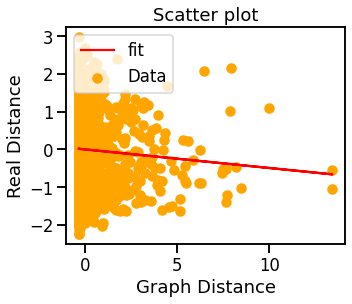

In [ ]:
fig = plt.figure(figsize=(5, 4))

plt.scatter(df['Graph Distance'], df['Distance'], color = 'orange', label = 'Data')

# Reg line
m, b = np.polyfit(df['Graph Distance'], df['Distance'],  1)
plt.plot(df['Graph Distance'], m*df['Graph Distance']+b, 'r-', label = 'fit')

plt.legend(loc='upper left')
plt.ylabel('Real Distance') 
plt.xlabel('Graph Distance')
plt.title('Scatter plot')
plt.show()

#### Distance difference

In [ ]:
df['Difference'] = df['Distance'] - df['Graph Distance']

Text(0.5, 1.0, 'Histogram of distance difference (Brain - Graph)')

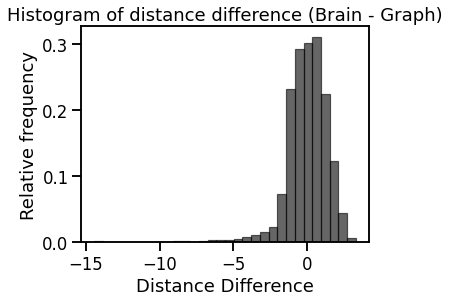

In [ ]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

mu, sigma = stats.norm.fit(df['Difference'])
xmin, xmax = axes.get_xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mu, sigma)

# Plot histogram of data
axes.hist(df['Difference'], 30, density=True, alpha=0.6, color='k', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Distance Difference')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of distance difference (Brain - Graph)')

In [ ]:
df.head()

,Source,Target,Distance,Graph Distance,Weight,Difference
0,A6M,AuRTM,0.696150,-0.351665,NaN,1.047815
1,A6M,AuRTL,0.830185,-0.348283,NaN,1.178467
2,A6M,MIP,0.131470,-0.350744,NaN,0.482214
3,A6M,AuA1,0.121013,-0.275558,NaN,0.396571
4,A6M,V1,1.427579,-0.352236,NaN,1.779814


In [ ]:
df[df['Graph Distance'] >0]['Graph Distance'].shape[0]

504

In [ ]:
sns.set_context("talk")

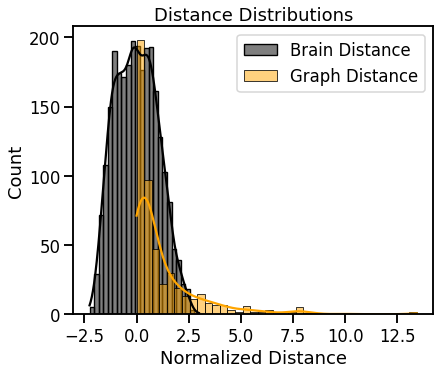

In [ ]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

sns.histplot(df['Distance'], kde = True, color = 'k', label='Brain Distance')
sns.histplot(df[df['Graph Distance'] >0]['Graph Distance'], kde = True, color = 'orange',  label='Graph Distance')
plt.title("Distance Distributions")
plt.xlabel("Normalized Distance")
plt.legend() 
plt.show()

### Bootstrapping

In [ ]:
import numpy as np
import random

# Brain distance
x_brain = df['Distance']
print(np.mean(x_brain))

sample_mean_brain = []
for i in range(116):
  y = random.sample(x_brain.tolist(), 10)
  avg = np.mean(y)
  sample_mean_brain.append(avg)

print(np.mean(sample_mean_brain))


# Graph distance
x_graph = df[df['Graph Distance'] >0]['Graph Distance']
print(np.mean(x_graph))

sample_mean_graph = []
for i in range(116):
  y = random.sample(x_brain.tolist(), 10)
  avg = np.mean(y)
  sample_mean_graph.append(avg)

print(np.mean(sample_mean_graph))

-2.872923362127968e-16
0.026426331324738074
1.2605962390478382
0.010998589664220477


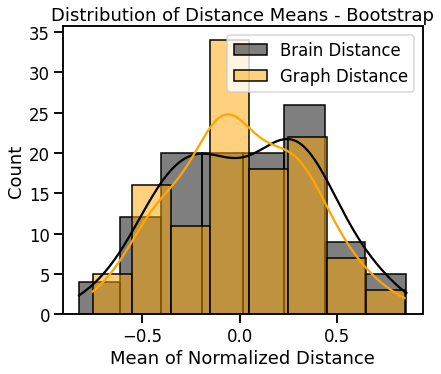

In [ ]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

sns.histplot(sample_mean_brain, kde = True, color = 'k', label='Brain Distance')
sns.histplot(sample_mean_graph, kde = True, color = 'orange',  label='Graph Distance')
plt.title("Distribution of Distance Means - Bootstrap")
plt.xlabel("Mean of Normalized Distance")
plt.legend() 
plt.show()

#### Bootstrapping with t statistic

In [ ]:
from scipy import stats

In [ ]:
stat, pval = stats.ttest_ind(x_brain, x_graph)
print(round(pval, 10))

0.0


In [ ]:
print(stat)

-22.24085551090675


In [ ]:
sample_test = []
for i in range(116):
  y_brain = random.sample(x_brain.tolist(), 10)
  y_graph = random.sample(x_graph.tolist(), 10)
  statistic = stats.ttest_ind(y_brain, y_graph)[0]
  sample_test.append(statistic)

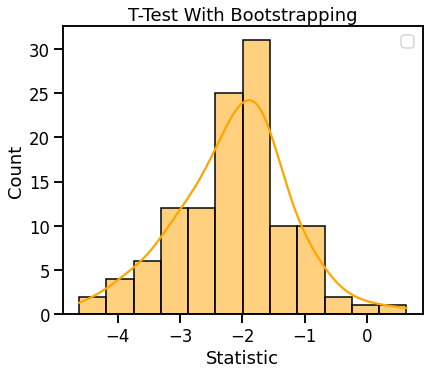

In [ ]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

sns.histplot(sample_test, kde = True, color = 'orange')
plt.xlabel("Statistic")
plt.title("T-Test With Bootstrapping")
plt.legend() 
plt.show()

#### Communities

In [ ]:
comm1 = louvain_comm[0]
comm2 = louvain_comm[1]
comm3 = louvain_comm[2]

In [ ]:
comm2

{'A19DI',
 'A19M',
 'A23V',
 'A23a',
 'A36',
 'A47L',
 'A47M',
 'AIP',
 'APir',
 'FST',
 'LIP',
 'MIP',
 'MST',
 'OPt',
 'PEC',
 'PFG',
 'PG',
 'PGM',
 'ProSt',
 'TEO',
 'TF',
 'TFO',
 'TH',
 'TL',
 'TLO',
 'V1',
 'V2',
 'V3',
 'V3A',
 'V4',
 'V4T',
 'V5',
 'V6',
 'V6A',
 'VIP'}

In [ ]:
df[(df['Target'] == 'APir')].sort_values(by = 'Distance').reset_index().drop('index', axis = 1)['Difference']

0     0.226241
1     0.552121
2     0.963559
3     1.080872
4     0.938775
5     1.096034
6     1.230333
7     1.342950
8     1.353291
9     1.372859
10    1.300656
11    1.378391
12    1.411141
13    1.299940
14    1.602440
15    1.371329
16    1.621666
17    1.770657
18    1.819839
19    1.662118
20    1.568192
21    2.075135
22    2.187622
23    2.117123
24    2.197640
25    2.139204
26    1.814631
27    2.373087
28    2.673830
29    2.772729
30    3.333065
Name: Difference, dtype: float64

In [ ]:
df[df['Weight'] > 0 ].describe()

,Distance,Graph Distance,Weight,Difference
count,1542.000000,1542.000000,1542.000000,1542.000000
mean,-0.263110,0.037310,0.031415,-0.300421
std,1.007053,1.092599,0.084044,1.519663
min,-2.251568,-0.353294,0.000003,-14.451494
25%,-1.104487,-0.347231,0.000521,-1.021887
50%,-0.371708,-0.313162,0.003106,-0.282702
75%,0.496072,-0.109592,0.021201,0.681549
max,2.588323,13.433940,1.000000,2.883672


In [ ]:
from community import community_louvain
import matplotlib.cm as cm

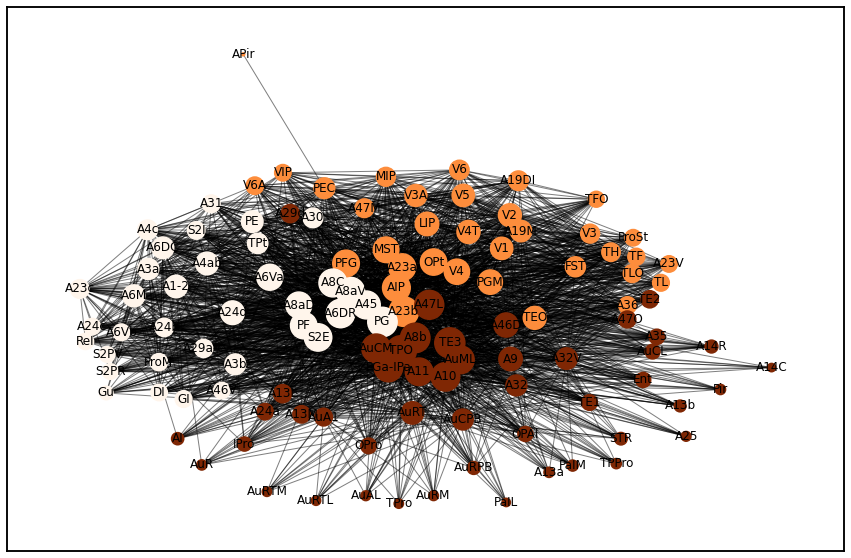

In [ ]:
partition = community_louvain.best_partition(G)

plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G)

cmap = cm.get_cmap('Oranges', max(partition.values()) + 1)
labels = nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size = [v * 1000 for v in deg.values()],
                       cmap=cmap, node_color=list(partition.values()), label = labels)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

#### Shortest (graph) paths - most connected (brain) areas

In [ ]:
# tpo- te3
print([p for p in nx.all_shortest_paths(G, 'TPO', 'TE3')])

# a23b - pg
print([p for p in nx.all_shortest_paths(G, 'A23b', 'PG')])

# TE3 - PG
print([p for p in nx.all_shortest_paths(G, 'TE3', 'PG')])

# A23b - A8b
print([p for p in nx.all_shortest_paths(G, 'A23b', 'A8b')])

# TPO - PG
print([p for p in nx.all_shortest_paths(G, 'TPO', 'PG')])


# A8b- PG
print([p for p in nx.all_shortest_paths(G, 'A8b', 'PG')])

# TPO -A8b
print([p for p in nx.all_shortest_paths(G, 'TPO', 'A8b', weight=None)])

# TE3- A23b
print([p for p in nx.all_shortest_paths(G, 'TE3', 'A23b', weight=None)])

[['TPO', 'TE3']]
[['A23b', 'PG']]
[['TE3', 'PG']]
[['A23b', 'A8b']]
[['TPO', 'PG']]
[['A8b', 'PG']]
[['TPO', 'A8b']]
[['TE3', 'A23b']]


In [ ]:
# TPO -A23b
print([p for p in nx.all_shortest_paths(G, 'TPO', 'A23b')])

# TE3- A8b
print([p for p in nx.all_shortest_paths(G, 'TE3', 'A8b')])

[['TPO', 'A23b']]
[['TE3', 'A8b']]


In [ ]:
nx.average_shortest_path_length(G)

1.6010494752623687